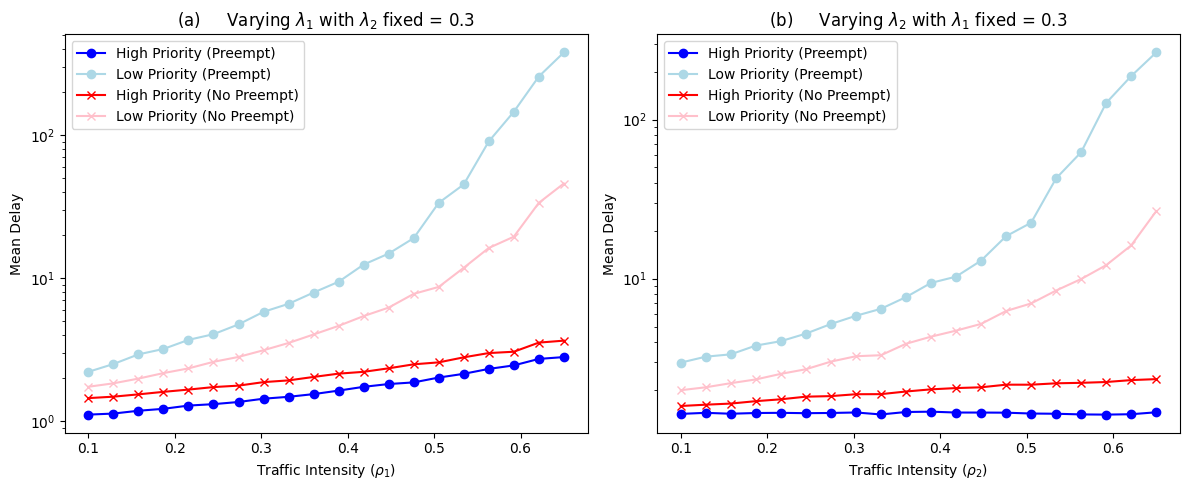

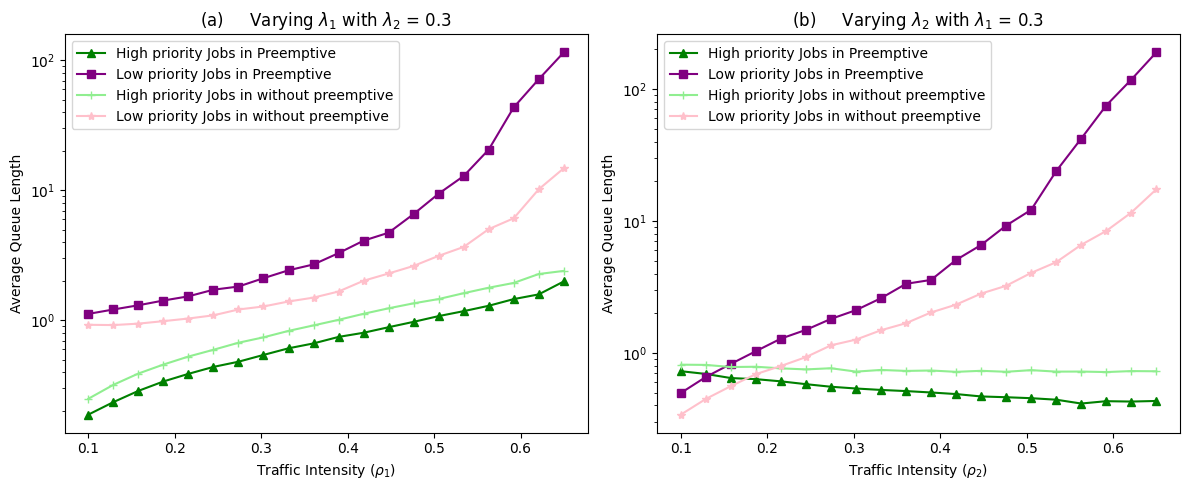

In [88]:
import heapq
import random
import numpy as np
random.seed(123456)
import matplotlib.pyplot as plt



def simulate_preemptive(a_rate1, a_rate2, s_rate, warmup_customers=800):
    mean_delay1 = []
    mean_delay2 = []
    means_cust = []
    means_cust1=[]
    means_cust2=[]

    for i in range(30):  
        clock = 0
        next_arrival1 = random.expovariate(a_rate1)
        next_arrival2 = random.expovariate(a_rate2)
        next_departure = float('inf')
        queue1 = []  
        queue2 = []  
        total_delay1 = 0
        total_delay2 = 0
        total_customers1 = 0
        total_customers2 = 0
        customers1_post_warmup = 0
        customers2_post_warmup = 0
        queue_snapshot = []
        queue1_snapshot=[]
        queue2_snapshot=[]
        serving_low_priority = False
        remaining_service_time = None

        while total_customers1 + total_customers2 < 3000:  
            next_event_time = min(next_arrival1, next_arrival2, next_departure)
            # print("\n next_event_time:",next_event_time)
            if next_event_time == next_arrival1:
                clock = next_arrival1
                total_customers1 += 1
                heapq.heappush(queue1, clock)
                next_arrival1 = clock + random.expovariate(a_rate1)
                if serving_low_priority and next_departure != float('inf'):
                    # print("\n serving_low_priority:",serving_low_priority)
                    # print("\n next_departure", next_departure)
                    remaining_service_time = next_departure - clock
                    next_departure = clock + remaining_service_time
                    # print("\n next departure:", next_departure)

                    serving_low_priority = False
            elif next_event_time == next_arrival2:
                # print("\n next_event_time == next_arrival2:")
                clock = next_arrival2
                total_customers2 += 1
                heapq.heappush(queue2, clock)
                next_arrival2 = clock + random.expovariate(a_rate2)

            if len(queue1) + len(queue2) == 1 and next_departure == float('inf'):
                service_time = random.expovariate(s_rate)
                next_departure = clock + service_time
                # print("\n next departure:", next_departure)


            if next_event_time == next_departure:
                clock = next_departure
                # print("\n next departure:", next_departure)

                if queue1:
                    fifo_time = heapq.heappop(queue1)
                    # if total_customers1 + total_customers2 > warmup_customers: 
                    #     print("\n if total_customers1 + total_customers2 > warmup_customers: ")
                    total_delay1 += clock - fifo_time
                    # print("\n total_delay1:",total_delay1)
                    customers1_post_warmup += 1
                    service_time = random.expovariate(s_rate)
                    next_departure = clock + service_time
                    # print("\n next departure:", next_departure)
                    serving_low_priority = False
                elif queue2:
                    if remaining_service_time is not None:
                        next_departure = clock + remaining_service_time
                        
                        remaining_service_time = None
                    else:
                        fifo_time = heapq.heappop(queue2)
                        if total_customers1 + total_customers2 > warmup_customers:
                            # print("\n if total_customers1 + total_customers2 > warmup_customers:") 
                            total_delay2 += clock - fifo_time
                            # print("\n total_delay2:",total_delay2)
                            customers2_post_warmup += 1
                        service_time = random.expovariate(s_rate)
                        next_departure = clock + service_time
                        serving_low_priority = True

            if len(queue1) + len(queue2) == 0:
                # print("\n if len(queue1) + len(queue2) == 0:")
                clock = min(next_arrival1, next_arrival2)
                # print("total_customers1 + total_customers2 ")
                next_departure = float('inf')

            if total_customers1 + total_customers2 > warmup_customers: 
                queue_snapshot.append(len(queue1) + len(queue2))
                queue1_snapshot.append(len(queue1))
                queue2_snapshot.append(len(queue2))

            # print("\n next departure:", next_departure)

        mean_delay1.append(total_delay1 / max(1, customers1_post_warmup))
        mean_delay2.append(total_delay2 / max(1, customers2_post_warmup))
        means_cust.append(np.mean(queue_snapshot))
        means_cust1.append(np.mean(queue1_snapshot))
        means_cust2.append(np.mean(queue2_snapshot))
        # print("\n mean_cust:",means_cust)

    return mean_delay1, mean_delay2, means_cust, means_cust1, means_cust2

# a_rate1 = 0.3
# a_rate2 = 0.3
# s_rate = 1
# mean_delay1, mean_delay2, means_cust,_,_ = simulate_preemptive(a_rate1, a_rate2, s_rate)
# print(f"Mean delay for high priority: {mean_delay1}")
# print(f"Mean delay for low priority: {mean_delay2}")
# print(f"Mean queue size: {means_cust}")


def simulate_priority(a_rate1, a_rate2, s_rate, warmup_customers=800):
    mean_delay1 = []
    mean_delay2 = []
    means_cust = []
    means_cust1=[]
    means_cust2=[]

    for i in range(30):  
        clock = 0
        next_arrival1 = random.expovariate(a_rate1)
        next_arrival2 = random.expovariate(a_rate2)
        next_departure = float('inf')
        queue1 = [] 
        queue2 = []  
        total_delay1 = 0
        total_delay2 = 0
        total_customers1 = 0
        total_customers2 = 0
        customers1_post_warmup = 0
        customers2_post_warmup = 0
        queue_snapshot = []
        queue1_snapshot=[]
        queue2_snapshot=[]
        current_serving = None  

        while total_customers1 + total_customers2 < 3000:  
            next_event_time = min(next_arrival1, next_arrival2, next_departure)
            
            if next_event_time == next_arrival1:
                clock = next_arrival1
                total_customers1 += 1
                heapq.heappush(queue1, clock)
                next_arrival1 = clock + random.expovariate(a_rate1)
                
            elif next_event_time == next_arrival2:
                clock = next_arrival2
                total_customers2 += 1
                heapq.heappush(queue2, clock)
                next_arrival2 = clock + random.expovariate(a_rate2)

            if len(queue1) + len(queue2) == 1 and next_departure == float('inf'):
                service_time = random.expovariate(s_rate)
                next_departure = clock + service_time
                current_serving = 'high' if queue1 else 'low'

            if next_event_time == next_departure:
                clock = next_departure
                if queue1 and (current_serving == 'high' or not queue2):
                    fifo_time = heapq.heappop(queue1)
                    if total_customers1 + total_customers2 > warmup_customers: 
                        total_delay1 += clock - fifo_time
                        customers1_post_warmup += 1
                    current_serving = 'high'
                elif queue2 and current_serving == 'low':
                    fifo_time = heapq.heappop(queue2)
                    if total_customers1 + total_customers2 > warmup_customers: 
                        total_delay2 += clock - fifo_time
                        customers2_post_warmup += 1
                    current_serving = 'low'

                if queue1 or queue2:
                    service_time = random.expovariate(s_rate)
                    next_departure = clock + service_time
                    current_serving = 'high' if queue1 else 'low'
                else:
                    next_departure = float('inf')

            if total_customers1 + total_customers2 > warmup_customers:  
                queue_snapshot.append(len(queue1) + len(queue2))
                queue1_snapshot.append(len(queue1))
                queue2_snapshot.append(len(queue2))

        mean_delay1.append(total_delay1 / max(1, customers1_post_warmup))
        mean_delay2.append(total_delay2 / max(1, customers2_post_warmup))
        means_cust.append(np.mean(queue_snapshot))
        means_cust1.append(np.mean(queue1_snapshot))
        means_cust2.append(np.mean(queue2_snapshot))


    return mean_delay1, mean_delay2, means_cust, means_cust1, means_cust2

def plot_comparison_all_cases_mean_delay(fixed_rates, s_rate):
    plt.figure(figsize=(12, 5))

    for i, fixed_rate in enumerate(fixed_rates):
        a_rate2 = fixed_rate
        a_rate1_values = np.linspace(0.1, 1 - a_rate2 - 0.05, 20)
        rho_values1 = [a_rate1 / s_rate for a_rate1 in a_rate1_values]
        
        preempt_high1, preempt_low1, priority_high1, priority_low1 = [], [], [], []
        for a_rate1 in a_rate1_values:
            mean_delay1_high, mean_delay1_low, _,_,_ = simulate_preemptive(a_rate1, a_rate2, s_rate)
            preempt_high1.append(np.mean(mean_delay1_high))
            preempt_low1.append(np.mean(mean_delay1_low))
            mean_delay1_high, mean_delay1_low, _,_,_ = simulate_priority(a_rate1, a_rate2, s_rate)
            priority_high1.append(np.mean(mean_delay1_high))
            priority_low1.append(np.mean(mean_delay1_low))
        
        a_rate1 = fixed_rate
        a_rate2_values = np.linspace(0.1, 1 - a_rate1 - 0.05, 20)
        rho_values2 = [a_rate2 / s_rate for a_rate2 in a_rate2_values]
        
        preempt_high2, preempt_low2, priority_high2, priority_low2 = [], [], [], []
        for a_rate2 in a_rate2_values:
            mean_delay2_high, mean_delay2_low, _,_,_ = simulate_preemptive(a_rate1, a_rate2, s_rate)
            preempt_high2.append(np.mean(mean_delay2_high))
            preempt_low2.append(np.mean(mean_delay2_low))
            mean_delay2_high, mean_delay2_low, _,_,_ = simulate_priority(a_rate1, a_rate2, s_rate)
            priority_high2.append(np.mean(mean_delay2_high))
            priority_low2.append(np.mean(mean_delay2_low))

        plt.subplot(1, 2, 2 * i + 1)
        plt.plot(rho_values1, preempt_high1, label='High Priority (Preempt)', marker='o', color='blue')
        plt.plot(rho_values1, preempt_low1, label='Low Priority (Preempt)', marker='o', color='lightblue')
        plt.plot(rho_values1, priority_high1, label='High Priority (No Preempt)', marker='x', color='red')
        plt.plot(rho_values1, priority_low1, label='Low Priority (No Preempt)', marker='x', color='pink')
        plt.xlabel(r'Traffic Intensity ($\rho_1$)')
        plt.ylabel('Mean Delay')
        plt.yscale('log')
        plt.title(f'(a)     Varying $\lambda_1$ with $\lambda_2$ fixed = {fixed_rate}')
        plt.legend()

        plt.subplot(1, 2, 2 * i + 2)
        plt.plot(rho_values2, preempt_high2, label='High Priority (Preempt)', marker='o', color='blue')
        plt.plot(rho_values2, preempt_low2, label='Low Priority (Preempt)', marker='o', color='lightblue')
        plt.plot(rho_values2, priority_high2, label='High Priority (No Preempt)', marker='x', color='red')
        plt.plot(rho_values2, priority_low2, label='Low Priority (No Preempt)', marker='x', color='pink')
        plt.xlabel(r'Traffic Intensity ($\rho_2$)')
        plt.ylabel('Mean Delay')
        plt.yscale('log')
        plt.title(f'(b)     Varying $\lambda_2$ with $\lambda_1$ fixed = {fixed_rate}')
        plt.legend()

    plt.tight_layout()
    plt.savefig('q2_priority_queue_mean_delay.pdf')
    plt.show()

def plot_comparison_all_cases_queue_length(fixed_rates, s_rate):
    plt.figure(figsize=(12, 5))

    for i, fixed_rate in enumerate(fixed_rates):
        a_rate2 = fixed_rate
        a_rate1_values = np.linspace(0.1, s_rate - a_rate2 - 0.05, 20)
        rho_values1 = [a_rate1 / s_rate for a_rate1 in a_rate1_values]

        preempt_queue_lengths1 = []
        priority_queue_lengths1 = []
        priority1_queue_lengths1 = []
        priority2_queue_lengths1 = []
        priority1_2_queue_lengths1 = []
        priority2_2_queue_lengths1 = []
        for a_rate1 in a_rate1_values:
            _, _, queue_length, priority1_length, priority2_length = simulate_preemptive(a_rate1, a_rate2, s_rate)
            preempt_queue_lengths1.append(np.mean(queue_length))
            priority1_queue_lengths1.append(np.mean(priority1_length))
            priority2_queue_lengths1.append(np.mean(priority2_length))
            _, _, queue_length, priority1_length, priority2_length = simulate_priority(a_rate1, a_rate2, s_rate)
            priority_queue_lengths1.append(np.mean(queue_length))
            priority1_2_queue_lengths1.append(np.mean(priority1_length))
            priority2_2_queue_lengths1.append(np.mean(priority2_length))


        a_rate1 = fixed_rate
        a_rate2_values = np.linspace(0.1, s_rate - a_rate1 - 0.05, 20)
        rho_values2 = [a_rate2 / s_rate for a_rate2 in a_rate2_values]

        preempt_queue_lengths2 = []
        priority_queue_lengths2 = []
        priority1_queue_lengths2 = []
        priority2_queue_lengths2 = []
        priority1_2_queue_lengths2 = []
        priority2_2_queue_lengths2 = []
        for a_rate2 in a_rate2_values:
            _, _, queue_length, priority1_length, priority2_length = simulate_preemptive(a_rate1, a_rate2, s_rate)
            preempt_queue_lengths2.append(np.mean(queue_length))
            priority1_queue_lengths2.append(np.mean(priority1_length))
            priority2_queue_lengths2.append(np.mean(priority2_length))
            _, _, queue_length, priority1_length, priority2_length = simulate_priority(a_rate1, a_rate2, s_rate)
            priority_queue_lengths2.append(np.mean(queue_length))
            priority1_2_queue_lengths2.append(np.mean(priority1_length))
            priority2_2_queue_lengths2.append(np.mean(priority2_length))

        plt.subplot(1, 2, 2 * i + 1)
        # plt.plot(rho_values1, preempt_queue_lengths1, label='Preemptive', marker='o', color='blue')
        # plt.plot(rho_values1, priority_queue_lengths1, label='Priority without Preemption', marker='x', color='red')
        plt.plot(rho_values1, priority1_queue_lengths1, label='High priority Jobs in Preemptive', marker='^', color='green')
        plt.plot(rho_values1, priority2_queue_lengths1, label='Low priority Jobs in Preemptive', marker='s', color='purple')
        plt.plot(rho_values1, priority1_2_queue_lengths1, label='High priority Jobs in without preemptive', marker='+', color='lightgreen')
        plt.plot(rho_values1, priority2_2_queue_lengths1, label='Low priority Jobs in without preemptive', marker='*', color='pink')

        plt.xlabel('Traffic Intensity ($\\rho_1$)')
        plt.ylabel('Average Queue Length')
        plt.yscale('log')
        plt.title(f'(a)     Varying $\\lambda_1$ with $\\lambda_2$ = {fixed_rate}')
        plt.legend()

        plt.subplot(1,2, 2 * i + 2)
        # plt.plot(rho_values2, preempt_queue_lengths2, label='Preemptive', marker='o', color='blue')
        # plt.plot(rho_values2, priority_queue_lengths2, label='Priority without Preemption', marker='x', color='red')
        plt.plot(rho_values2, priority1_queue_lengths2, label='High priority Jobs in Preemptive', marker='^', color='green')
        plt.plot(rho_values2, priority2_queue_lengths2, label='Low priority Jobs in Preemptive', marker='s', color='purple')
        plt.plot(rho_values1, priority1_2_queue_lengths2, label='High priority Jobs in without preemptive', marker='+', color='lightgreen')
        plt.plot(rho_values1, priority2_2_queue_lengths2, label='Low priority Jobs in without preemptive', marker='*', color='pink')

        plt.xlabel('Traffic Intensity ($\\rho_2$)')
        plt.ylabel('Average Queue Length')
        plt.yscale('log')
        plt.title(f'(b)     Varying $\\lambda_2$ with $\\lambda_1$ = {fixed_rate}')
        plt.legend()

    plt.tight_layout()
    plt.savefig('q2_priority_queue_length.pdf')
    plt.show()


# Define fixed rates and service rate
fixed_rates = [0.3]
s_rate = 1
plot_comparison_all_cases_mean_delay(fixed_rates, s_rate)
plot_comparison_all_cases_queue_length(fixed_rates,s_rate)
